# Quantização
__Determinação da SQNR para análise na qualidade do procesos de quantização__

## Parte I:
__Determinar a SQNR para os níveis L= [ 4, 8, 16, 64 ], e encontrar o valor de níveis que corresponde a uma SQNR(dB) = 48.5 dB__

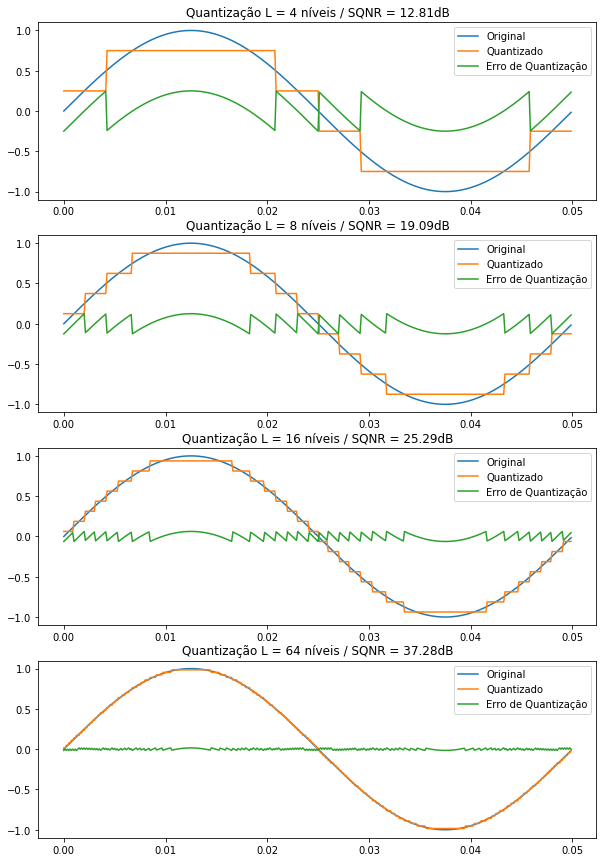

In [1]:
import numpy as np
import matplotlib.pyplot as plt
fs=8000                                              # Frequência de amostragem
Ts=1/fs                                              # Período de amostragem
fm=20                                                # Frequência da onda
Tm=1/fm                                              # Período de amostragem
t= np.arange(0,Tm,Ts)                                # Eixo do tempo
m_t=np.sin(2*np.pi*fm*t)                             # Sinal m(t)
N=len(m_t)
L= [4, 8,16,64];                                 # Níveis de quantização
sig_max=max(m_t)                                     # Encontra pico máximo
sig_min=min(m_t)                                     # Encontra pico mínimo
plt.figure(1,[10,15])
Pm_t =(np.linalg.norm(m_t)**2)/N # Cálculo da potência no tempo
# Quantização com round() para cada nível de quantização especificado
for il in range(0,len(L)):
    Li = L[il]
    Delta=(sig_max-sig_min)/Li                       # Intervalo de quantização (distância entre um nível e outro)
    q_level=np.arange(sig_min+Delta/2,sig_max,Delta) # Vetor com as amplitudes dos Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)

    sigp=m_t-sig_min                                 # Deixa o sinal somente com amplitudes positivas (shift para cima)
    # Calcula a quantidade de nívels (não inteiro ainda) de cada amostra (elementos >= 0)
    sigp=sigp*(1/Delta)                                
    sigp=sigp + 1/2 +0.0001                          # Tira elementos do zero 
    # Agora que nenhum valor do sinal  é zero nem negativo:
    qindex=np.round(sigp)                            # Encontra inteiro mais proximo para cada elemento
    qindex[qindex>Li] = Li                           # Trunca o excedente de qindex 
    qindex = qindex.astype(int)                      # Casting para inteiro (garantindo que é do tipo inteiro)
    q_out=q_level[abs(qindex-1)]                     # Distribui nos níveis cada elemento 
    P_e =(np.linalg.norm(m_t-q_out)**2)/N # Cálculo da potência no tempo
    sqnr = Pm_t/P_e
    sqnr_db = 10*np.log10(sqnr)
        
    var=4
    plt.subplot('{}1{}'.format(len(L),il+1))
    plt.plot(t,m_t,t,q_out,t,(m_t-q_out))
    plt.title('Quantização L = {} níveis / SQNR = {:.2f}dB'.format(Li,sqnr_db))
    plt.legend(["Original", "Quantizado", "Erro de Quantização"])

plt.show()

__ No título de cada plot vemos a SQNR correspondende:__
* L = 4 : SQNR = 12.81 dB
* L = 8 : SQNR = 19.09 dB
* L = 16: SQNR = 25.29 dB
* L = 64: SQNR = 37.28 dB

__E uma SQNR de 48.5dB? Por tentativa e erro, encotramos o valor L = 256 como sendo o necessário para que a SQNR requerida fosse gerada:__

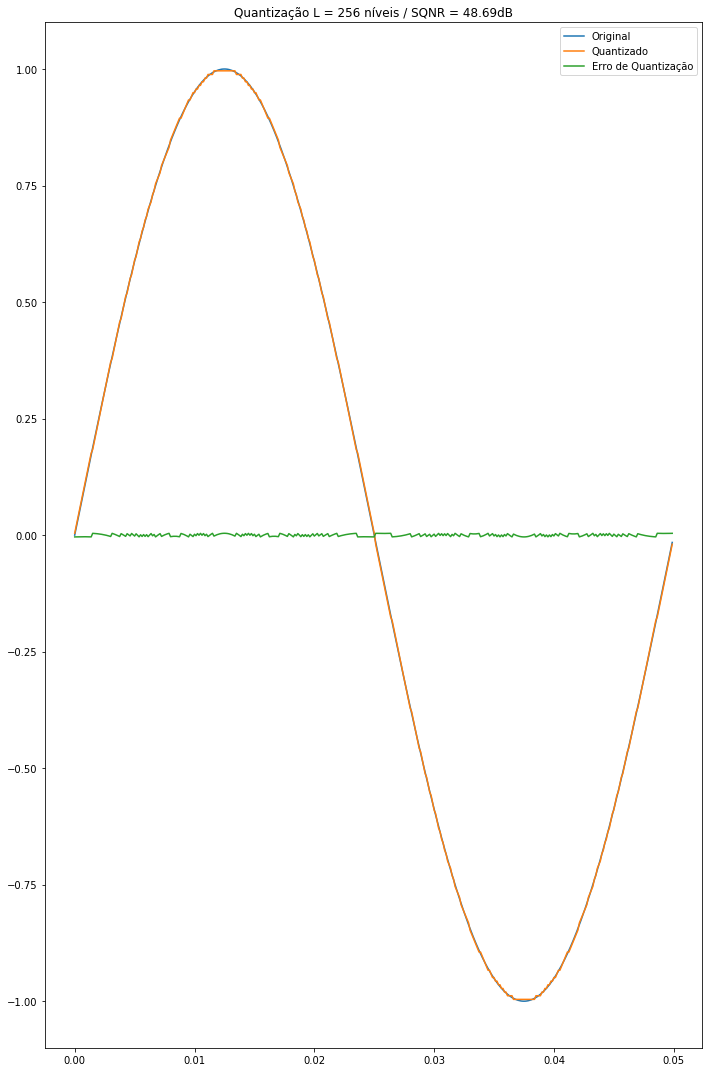

In [26]:
import numpy as np
import matplotlib.pyplot as plt
fs=8000                                              # Frequência de amostragem
Ts=1/fs                                              # Período de amostragem
fm=20                                                # Frequência da onda
Tm=1/fm                                              # Período de amostragem
t= np.arange(0,Tm,Ts)                                # Eixo do tempo
m_t=np.sin(2*np.pi*fm*t)                             # Sinal m(t)
N=len(m_t)
L= [256];                                 # Níveis de quantização
sig_max=max(m_t)                                     # Encontra pico máximo
sig_min=min(m_t)                                     # Encontra pico mínimo
plt.figure(1,[10,15])
Pm_t =(np.linalg.norm(m_t)**2)/N # Cálculo da potência no tempo
# Quantização com round() para cada nível de quantização especificado
for il in range(0,len(L)):
    Li = L[il]
    Delta=(sig_max-sig_min)/Li                       # Intervalo de quantização (distância entre um nível e outro)
    q_level=np.arange(sig_min+Delta/2,sig_max,Delta) # Vetor com as amplitudes dos Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)

    sigp=m_t-sig_min                                 # Deixa o sinal somente com amplitudes positivas (shift para cima)
    # Calcula a quantidade de nívels (não inteiro ainda) de cada amostra (elementos >= 0)
    sigp=sigp*(1/Delta)                                
    sigp=sigp + 1/2 +0.0001                          # Tira elementos do zero 
    # Agora que nenhum valor do sinal  é zero nem negativo:
    qindex=np.round(sigp)                            # Encontra inteiro mais proximo para cada elemento
    qindex[qindex>Li] = Li                           # Trunca o excedente de qindex 
    qindex = qindex.astype(int)                      # Casting para inteiro (garantindo que é do tipo inteiro)
    q_out=q_level[abs(qindex-1)]                     # Distribui nos níveis cada elemento 
    P_e =(np.linalg.norm(m_t-q_out)**2)/N # Cálculo da potência no tempo
    sqnr = Pm_t/P_e
    sqnr_db = 10*np.log10(sqnr)
        
    var=4
    plt.figure(1,figsize=(8, 10))
    #plt.subplot('{}1{}'.format(len(L),il+1))
    plt.plot(t,m_t,t,q_out,t,(m_t-q_out))
    plt.title('Quantização L = {} níveis / SQNR = {:.2f}dB'.format(Li,sqnr_db))
    plt.legend(["Original", "Quantizado", "Erro de Quantização"])
    
plt.tight_layout()
plt.show()


## Parte II
__Realizar a quantização com  8, 32  e 128 níveis. Realizar a recontrução ideal do sinal, calcular a SQNR e analisar a qualidade da reconstrução para cada uma das quantizações:__

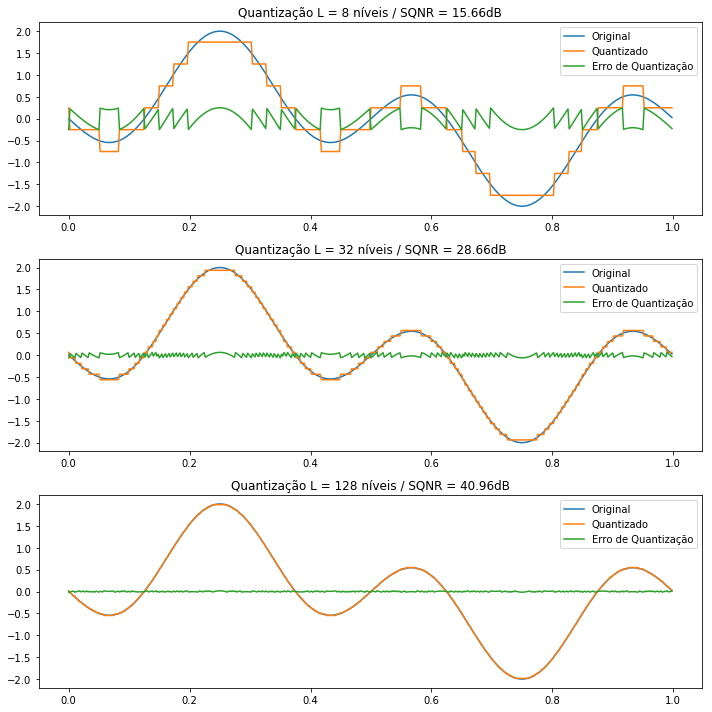

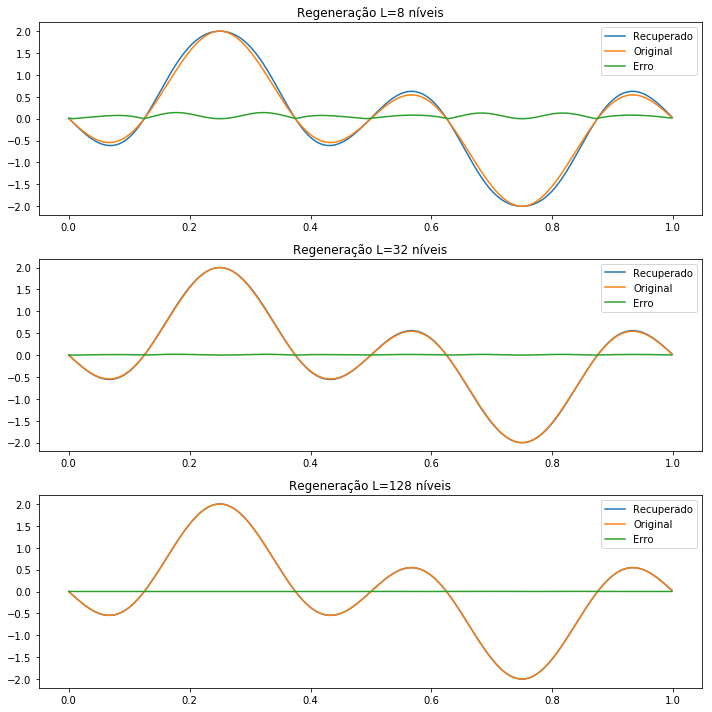

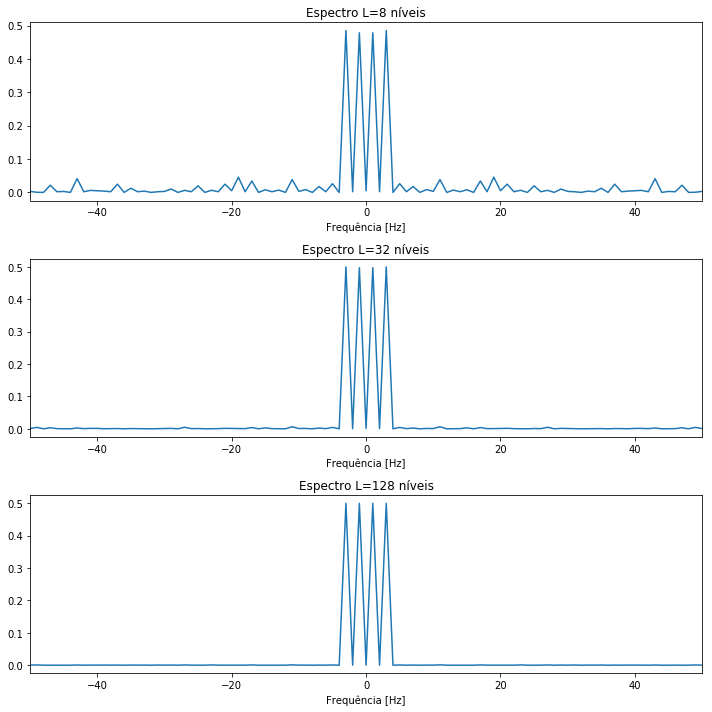

In [11]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift,ifft

# Para diminuir o tamanho do código desse experimento, coletaremos todos os dados Passo 1 da Prática 1
# e trabalharemos com o sinal gerado lá. Todas as variáveis terão o mesmo nome.
# O arquivo .mat deve sempre está na pasta em que o script está. Se necessário, rode o Passo 1 da Prática 1!!!
variaveis = loadmat('./Amostragem.mat')
T = float(variaveis['T'])
lfft = int(variaveis['lfft'])
N_samp = int(variaveis['N_samp'])
S_out = variaveis['S_out'].flatten()
s_out = variaveis['s_out'].flatten()
m_t = variaveis['m_t'].flatten()
t = variaveis['t'].flatten()
freq = variaveis['freq'].flatten()
Bs = fm1 = float(variaveis['fm1'])
N=len(m_t)
L= [8, 32,128];                                 # Níveis de quantização
sig_max=max(m_t)                                     # Encontra pico máximo
sig_min=min(m_t)                                     # Encontra pico mínimo
Pm_t =(np.linalg.norm(m_t)**2)/N # Cálculo da potência no tempo
for il in range(0,len(L)):
    Li = L[il]
    Delta=(sig_max-sig_min)/Li                       # Intervalo de quantização (distância entre um nível e outro)
    q_level=np.arange(sig_min+Delta/2,sig_max,Delta) # Vetor com as amplitudes dos Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)

    sigp=m_t-sig_min                                 # Deixa o sinal somente com amplitudes positivas (shift para cima)
    # Calcula a quantidade de nívels (não inteiro ainda) de cada amostra (elementos >= 0)
    sigp=sigp*(1/Delta)                                
    sigp=sigp + 1/2 +0.0001                          # Tira elementos do zero 
    # Agora que nenhum valor do sinal  é zero nem negativo:
    qindex=np.round(sigp)                            # Encontra inteiro mais proximo para cada elemento
    qindex[qindex>Li] = Li                           # Trunca o excedente de qindex 
    qindex = qindex.astype(int)                      # Casting para inteiro (garantindo que é do tipo inteiro)
    q_out=q_level[abs(qindex-1)]                     # Distribui nos níveis cada elemento 
    #reconstrução de Q_out no dominio da frequencia:
    #FFT do sinal quantizado:
    Q_out=fftshift(fft(q_out,lfft)/lfft)
    BW=10                                                       # Largura de banda de 10
    H_lpf=np.zeros(lfft)                                         # Zera vetor filtro
    H_lpf[lfft//2-BW:lfft//2+BW-1]=1                             # Define 1 na frequência desejada
    Q_recv=N_samp*Q_out*H_lpf                                    # Filtragem ideal
    q_recv=np.real(ifft(fftshift(Q_recv)))                       # Reconstroi o sinal no tempo
    q_recv=q_recv*np.max(m_t)/np.max(q_recv)                     # Dá ganho pro sinal reconstruído

    P_e =(np.linalg.norm(m_t-q_out)**2)/N # Cálculo da potência no tempo
    sqnr = Pm_t/P_e
    sqnr_db = 10*np.log10(sqnr)
    var=4
    plt.figure(1,figsize=(10, 10))
    plt.subplot('{}1{}'.format(len(L),il+1))
    plt.plot(t,m_t,t,q_out,t,(m_t-q_out))
    plt.title('Quantização L = {} níveis / SQNR = {:.2f}dB'.format(Li,sqnr_db))
    plt.legend(["Original", "Quantizado", "Erro de Quantização"])
    plt.tight_layout()
    plt.figure(2,figsize=(10, 10))
    plt.subplot('{}1{}'.format(len(L),il+1))
    plt.title('Regeneração L={} níveis'.format(Li))
    plt.plot(t,q_recv,t,m_t,t,abs(m_t-q_recv))
    plt.legend(["Recuperado","Original","Erro"])
    plt.tight_layout()
    plt.figure(3,figsize=(10, 10))
    plt.subplot('{}1{}'.format(len(L),il+1))
    plt.title('Espectro L={} níveis'.format(Li))
    plt.plot(freq,abs(Q_out))
    plt.xlabel("Frequência [Hz]")
    plt.xlim([-50,50])
    plt.tight_layout()
plt.show()


__Vemos que mesmo com as perdas decorrentes da quantização, é possível reconstruir um sinal com qualidade. Apenas a reconstrução com 8 níveis apresentou visível diferença em relação ao sinal original. Vemos que o seu espectro apresenta pequenas componentes de frequencias mais elevadas do que o sinal original apresenta. Isso acontece devido aos saltos entre os níveis de amplitude, que geram componentes de frequência elevadas. Os níveis L = 32 e L= 128 não geram saltos tão abruptos, de forma que componentes de frequência elevada não são geradas com tanta intensidade quanto o que ocorre para L = 8.__